In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census ##

In [2]:
census_filename = "nc-est2014-agesex-res.csv"
full = Table.read_table(census_filename) # load in the census table
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [3]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [4]:
partial.set_format("POPESTIMATE2014", NumberFormatter).set_format("POPESTIMATE2010", NumberFormatter)

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [5]:
# Make things easier to read by changing the names of the estimate labels
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [6]:
# Sort by age
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,"3,951,330","3,948,350"
1,0,"2,018,420","2,017,857"
2,0,"1,932,910","1,930,493"
0,1,"3,957,888","3,962,123"
1,1,"2,020,332","2,023,253"
2,1,"1,937,556","1,938,870"
0,2,"4,090,862","3,957,772"
1,2,"2,088,685","2,022,502"
2,2,"2,002,177","1,935,270"
0,3,"4,111,920","4,005,190"


In [7]:
# Sort by age (another way)
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
0,999,"309,347,057","318,857,056"
1,999,"152,089,484","156,936,487"
2,999,"157,257,573","161,920,569"
0,100,"54,409","72,197"
1,100,"9,351","13,729"
2,100,"45,058","58,468"
0,99,"32,178","41,828"
1,99,"6,104","9,037"
2,99,"26,074","32,791"
0,98,"47,037","60,185"


In [8]:
simple.sort("2010")

SEX,AGE,2010,2014
1,99,"6,104","9,037"
1,100,"9,351","13,729"
1,98,"9,504","13,649"
1,97,"14,775","20,479"
1,96,"22,022","31,235"
2,99,"26,074","32,791"
1,95,"31,736","42,824"
0,99,"32,178","41,828"
2,98,"37,533","46,536"
1,94,"43,828","62,130"


In [9]:
differences = simple.column("2010") - simple.column("2014")
simple.with_column('2010-2014 difference', differences).sort("2010-2014 difference")

SEX,AGE,2010,2014,2010-2014 difference
0,999,"309,347,057","318,857,056",-9509999
1,999,"152,089,484","156,936,487",-4847003
2,999,"157,257,573","161,920,569",-4662996
0,67,"2,693,709","3,485,502",-791793
0,64,"2,706,063","3,488,136",-782073
0,66,"2,621,346","3,347,776",-726430
0,65,"2,678,532","3,384,449",-705917
0,71,"1,953,614","2,519,748",-566134
0,34,"3,822,188","4,362,895",-540707
0,23,"4,217,221","4,698,584",-481363


## Line Plots ##

In [10]:
# Remove the age totals

no_999 = simple.where("AGE", are.not_equal_to(999))
no_999 = simple.where(1, are.not_equal_to(999)) #
no_999

SEX,AGE,2010,2014
0,0,"3,951,330","3,948,350"
0,1,"3,957,888","3,962,123"
0,2,"4,090,862","3,957,772"
0,3,"4,111,920","4,005,190"
0,4,"4,077,552","4,003,448"
0,5,"4,064,653","4,004,858"
0,6,"4,073,013","4,134,352"
0,7,"4,043,047","4,154,000"
0,8,"4,025,604","4,119,524"
0,9,"4,125,415","4,106,832"


In [11]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')
everyone

AGE,2010,2014
0,"3,951,330","3,948,350"
1,"3,957,888","3,962,123"
2,"4,090,862","3,957,772"
3,"4,111,920","4,005,190"
4,"4,077,552","4,003,448"
5,"4,064,653","4,004,858"
6,"4,073,013","4,134,352"
7,"4,043,047","4,154,000"
8,"4,025,604","4,119,524"
9,"4,125,415","4,106,832"


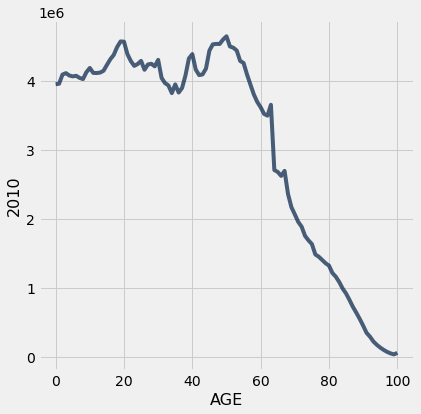

In [12]:
# Lets plot the number of ages during 2010
# Make Age the X-axis and 2010 the y-axis
everyone.plot('AGE', '2010')

In [13]:
4 * 1e6

4000000.0

In [14]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

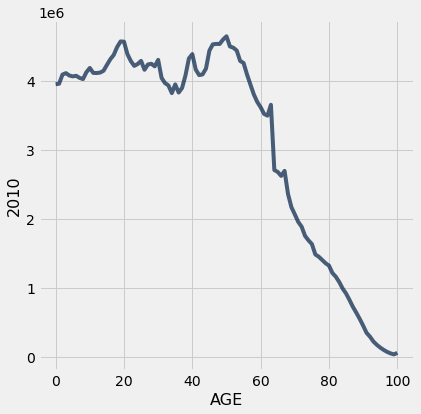

In [15]:
# add a python comment
# 2010 Population per Age 
# Age is the X-axis and population in 2010 is y-axis
everyone.plot('AGE', '2010')

2010 Population per Age


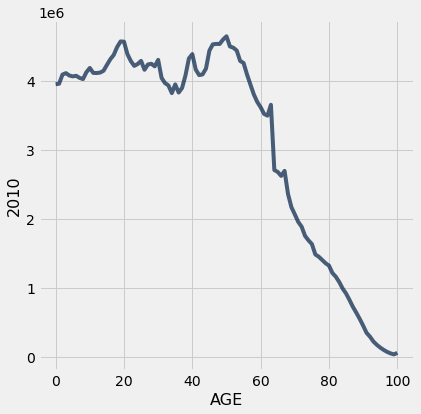

In [16]:
# print out what the tables is
print("2010 Population per Age")
everyone.plot('AGE', '2010')

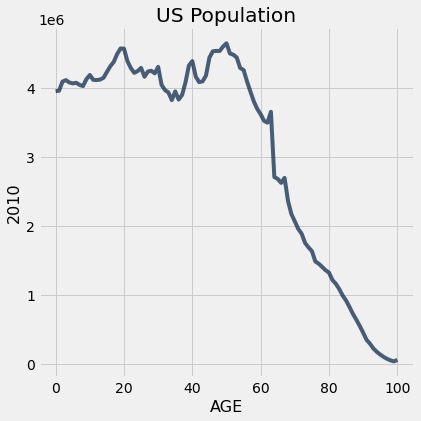

In [17]:
# Add a title to plots
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL; not needed for COMS1016

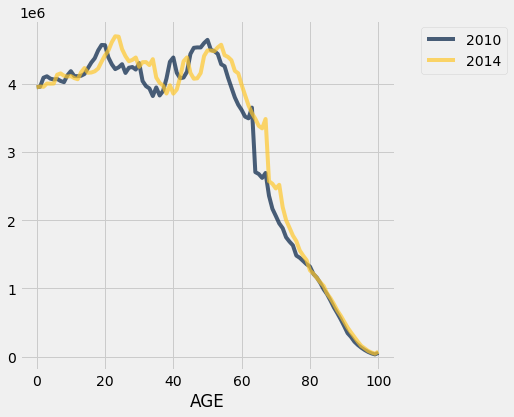

In [18]:
# Age distribution for two different years
# hint just plot AGE
everyone.plot('AGE')

## Males and Females in 2014 ##


In [19]:
# Let's compare male and female counts per age
# no_999 "SEX" codes males as 1 and females as 2
# Get rid of SEX column
males = no_999.where('SEX', 1).drop("SEX")
females = no_999.where('SEX', 2).drop("SEX")
females

AGE,2010,2014
0,"1,932,910","1,930,493"
1,"1,937,556","1,938,870"
2,"2,002,177","1,935,270"
3,"2,010,648","1,956,572"
4,"1,993,240","1,959,950"
5,"1,988,080","1,961,391"
6,"1,993,603","2,024,024"
7,"1,979,908","2,031,760"
8,"1,971,142","2,014,402"
9,"2,018,378","2,009,560"


In [20]:
# Make a new Table pop_2014 where the columns are:
# Age
# Males: number of males in 2014
# Females: number of females in 2014
pop_2014 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2014'),  #,,
    'Females', females.column('2014') #,
)
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


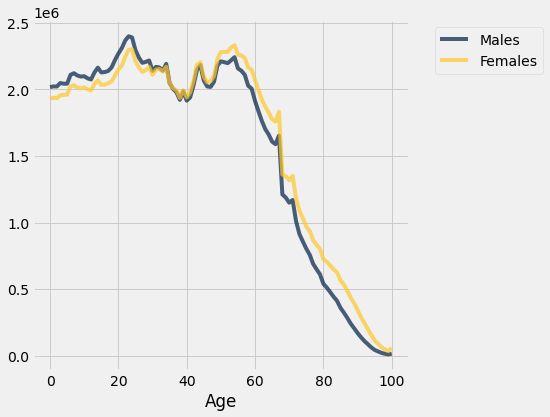

In [21]:
pop_2014.plot('Age')

In [22]:
# Calculate the percent female for each age
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

array([48.89366444, 48.93512897, 48.89796583, 48.85091594, 48.95654945,
       48.9752945 , 48.95625723, 48.91092922, 48.89890191, 48.93212091,
       48.9734048 , 48.99969062, 48.99606517, 48.95633512, 48.86619665,
       48.88170995, 48.86445062, 48.88986227, 48.76308397, 48.668799  ,
       48.63932932, 48.5330796 , 48.66269094, 48.92327135, 49.03933504,
       49.08996242, 49.16509171, 49.21162965, 49.28169646, 49.44899983,
       49.65375766, 49.75983547, 49.86565039, 49.93824999, 49.74770193,
       49.99251351, 50.05521355, 50.20280862, 50.18189092, 50.10049432,
       50.31587643, 50.47966604, 50.40624483, 50.42907187, 50.23118137,
       50.32445422, 50.37830234, 50.53327291, 50.51106084, 50.55818402,
       50.75941276, 50.86725098, 50.93664868, 51.06392595, 50.97417608,
       51.18857886, 51.29709649, 51.45934869, 51.62031101, 51.70400468,
       51.97408419, 52.08985538, 52.15439053, 52.36152155, 52.36785492,
       52.49779211, 52.53185996, 52.56760719, 52.90700545, 53.15

In [23]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([48.894, 48.935, 48.898, 48.851, 48.957, 48.975, 48.956, 48.911,
       48.899, 48.932, 48.973, 49.   , 48.996, 48.956, 48.866, 48.882,
       48.864, 48.89 , 48.763, 48.669, 48.639, 48.533, 48.663, 48.923,
       49.039, 49.09 , 49.165, 49.212, 49.282, 49.449, 49.654, 49.76 ,
       49.866, 49.938, 49.748, 49.993, 50.055, 50.203, 50.182, 50.1  ,
       50.316, 50.48 , 50.406, 50.429, 50.231, 50.324, 50.378, 50.533,
       50.511, 50.558, 50.759, 50.867, 50.937, 51.064, 50.974, 51.189,
       51.297, 51.459, 51.62 , 51.704, 51.974, 52.09 , 52.154, 52.362,
       52.368, 52.498, 52.532, 52.568, 52.907, 53.154, 53.405, 53.592,
       53.929, 54.4  , 54.642, 54.728, 55.249, 55.702, 56.179, 56.816,
       57.278, 57.97 , 58.654, 59.426, 60.31 , 61.159, 62.261, 63.24 ,
       64.423, 65.71 , 66.783, 67.659, 69.009, 69.972, 71.585, 72.745,
       74.225, 75.542, 77.322, 78.395, 80.984])

In [24]:
# Add female percent to our table.
# Ad a column names percent female
pop_2014 = pop_2014.with_column('Percent female', pct_female)
pop_2014

Age,Males,Females,Percent female
0,2017857,1930493,48.894
1,2023253,1938870,48.935
2,2022502,1935270,48.898
3,2048618,1956572,48.851
4,2043498,1959950,48.957
5,2043467,1961391,48.975
6,2110328,2024024,48.956
7,2122240,2031760,48.911
8,2105122,2014402,48.899
9,2097272,2009560,48.932


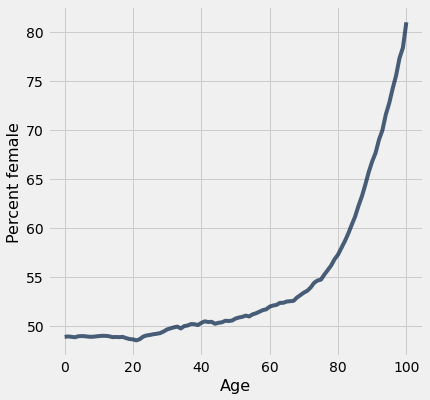

In [26]:
pop_2014.plot('Age', 'Percent female')

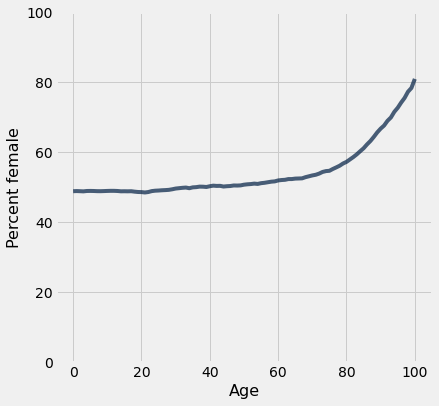

In [27]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2014.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for COMS1016

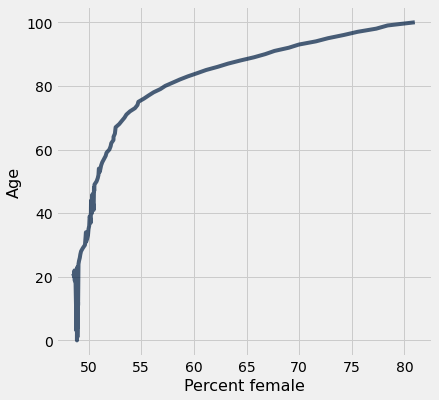

In [29]:
pop_2014.plot('Percent female', 'Age')

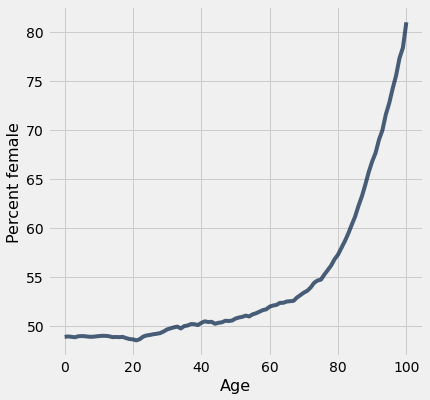

In [30]:
pop_2014.plot('Age', 'Percent female')

## Scatter Plots ##

In [31]:
# Actors and their highest grossing movies
# Read in the table called 'actors.csv'

actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


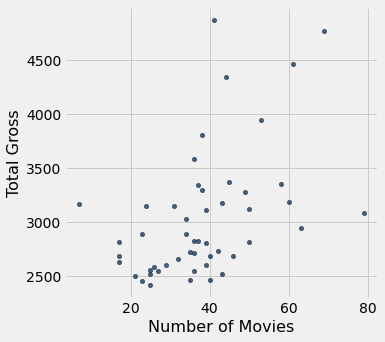

In [32]:
actors.scatter('Number of Movies', 'Total Gross')

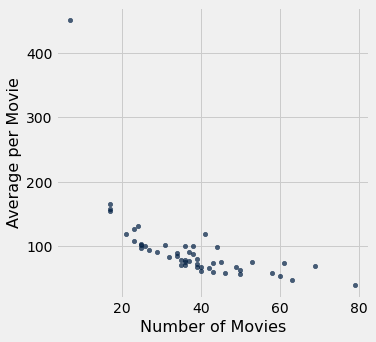

In [33]:
actors.scatter('Number of Movies', 'Average per Movie')

In [34]:
actors.where('Average per Movie', are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


## Bar Charts ##

In [36]:
# Highest grossing movies as of 2017
# Read in table called 'top_movies_2017.csv'
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [37]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [38]:
10000000 / 1000000

10.0

In [39]:
# Convert Gross (Adjusted) to millions of dollars for readability
millions = top10_adjusted.column("Gross (Adjusted)") / 1000000
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


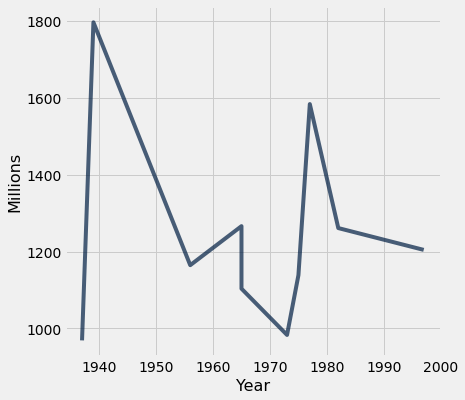

In [40]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

# Why not?

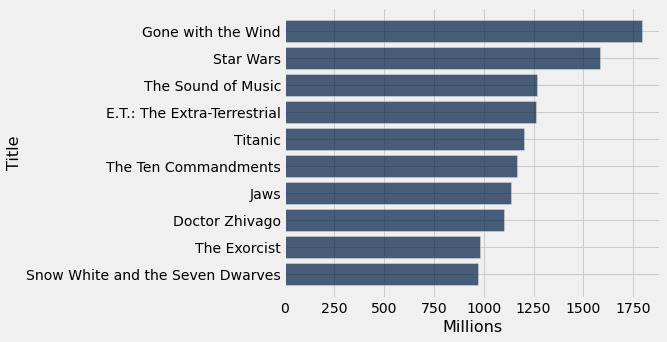

In [41]:
top10_adjusted.barh('Title', 'Millions')

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_5_completed.ipynb")